In [25]:
%matplotlib notebook
%matplotlib notebook
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

a

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [78]:
A = train_X.reshape(-1,28*28)

In [80]:
A = scale(A)

In [81]:
U,S,VT = np.linalg.svd(A,full_matrices=False)

b

<IPython.core.display.Javascript object>


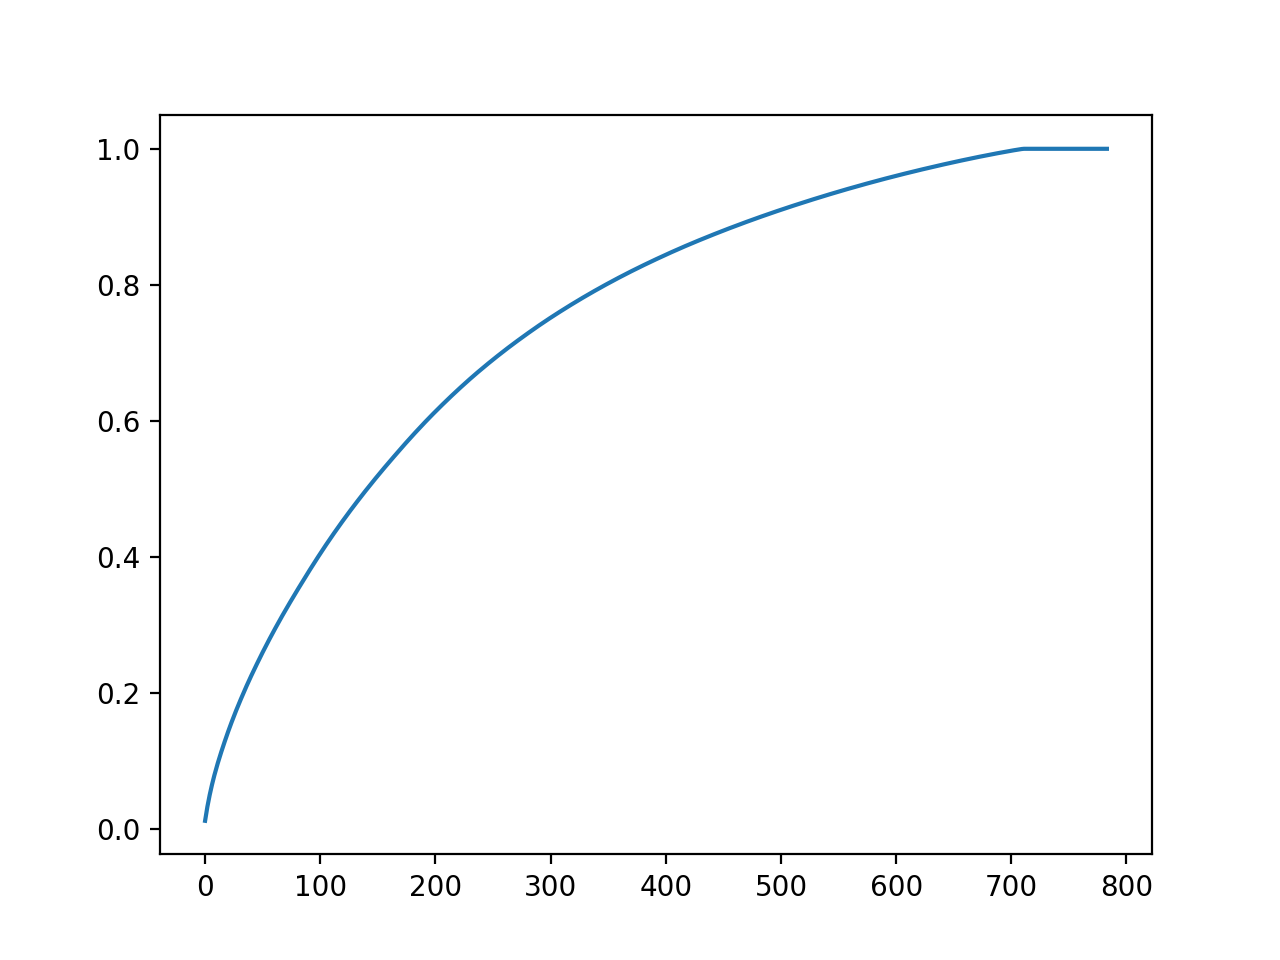

In [82]:
plt.figure()
plt.plot(np.cumsum(S/np.sum(S)))

400 modes could be enough

c

U is eigen digit, S is energy of mode, V is mode

d

In [83]:
PC_A = A@(VT[[2,3,5],].T)

<IPython.core.display.Javascript object>


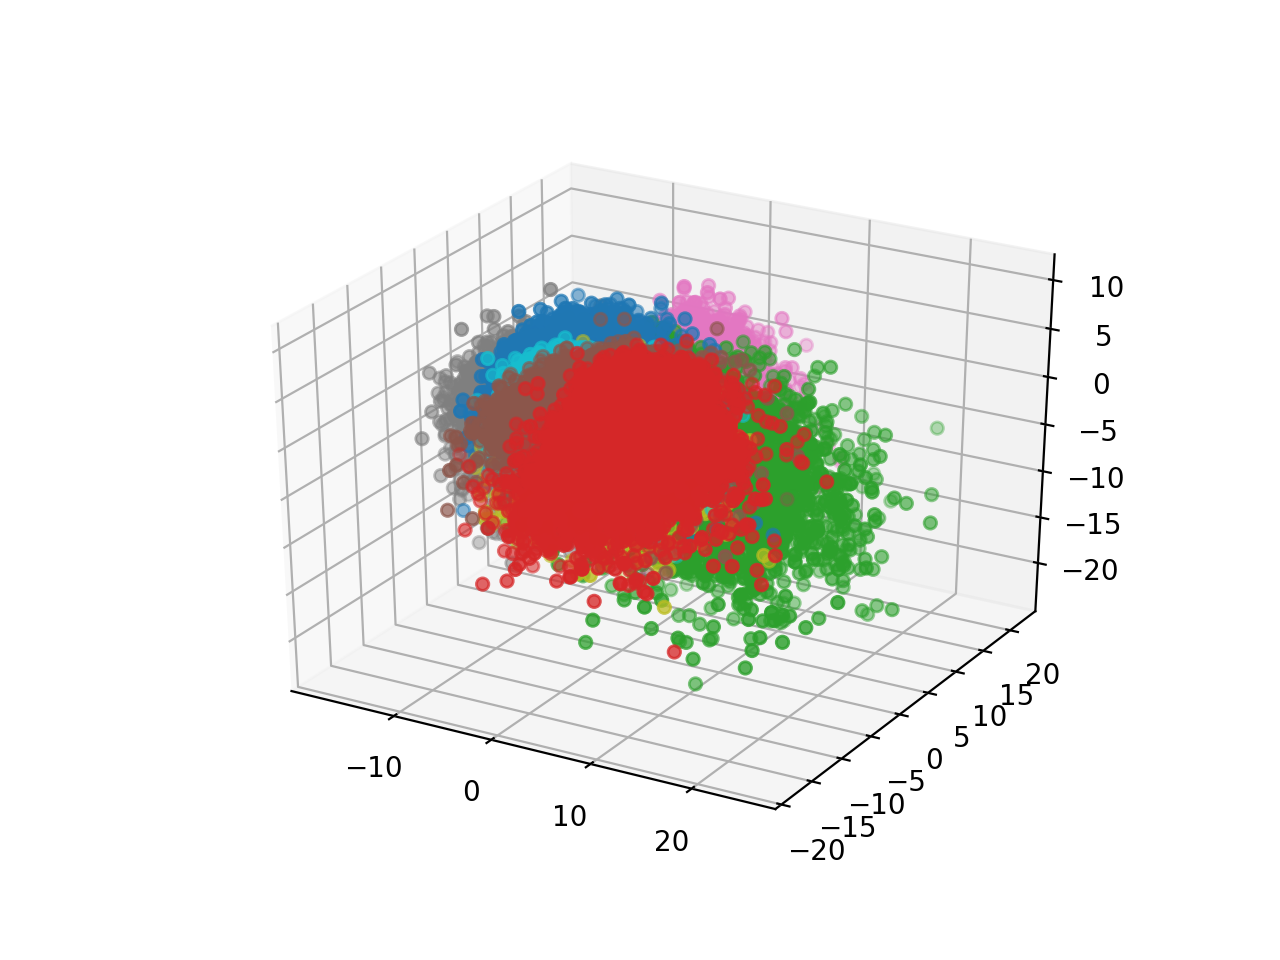

In [84]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(10):
    ax.scatter3D(PC_A[train_y==i,0],PC_A[train_y==i,1],PC_A[train_y==i,2])

e

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [118]:
LDA_data = np.concatenate((PC_A[train_y==6,],PC_A[train_y==9,]))
label = [6]*sum(train_y==6)+[9]*sum(train_y==9)

In [119]:
lda = LinearDiscriminantAnalysis()
cl1 = lda.fit(LDA_data, label)

In [120]:
train_acc = sum(cl1.predict(LDA_data)==np.array(label))/len(label)
print(train_acc)

0.9827252043481924


f

In [121]:
LDA_data = np.concatenate((PC_A[train_y==6,],PC_A[train_y==9,],PC_A[train_y==5,]))
label = [6]*sum(train_y==6)+[9]*sum(train_y==9)+[5]*sum(train_y==5)

In [122]:
lda = LinearDiscriminantAnalysis()
cl2 = lda.fit(LDA_data, label)

In [123]:
train_acc = sum(cl1.predict(LDA_data)==np.array(label))/len(label)
print(train_acc)

0.6745719574271171


g

In [127]:
test = test_X.reshape(-1,28*28)
test = scale(test)

In [128]:
PC_test = test@(VT[[2,3,5],].T)

In [156]:
res = []
for i in range(9):
    for j in range(i+1,10):
        LDA_data = np.concatenate((PC_A[train_y==i,],PC_A[train_y==j,]))
        label = [i]*sum(train_y==i)+[j]*sum(train_y==j)
        LDA_test = np.concatenate((PC_test[test_y==i,],PC_test[test_y==j,]))
        truth = [i]*sum(test_y==i)+[j]*sum(test_y==j)
        lda = LinearDiscriminantAnalysis()
        cl = lda.fit(LDA_data, label)
        res.append([i,j,sum(cl.predict(LDA_test)==np.array(truth))/len(truth)])

In [157]:
res

[[0, 1, 0.9115839243498818],
 [0, 2, 0.9423459244532804],
 [0, 3, 0.9195979899497487],
 [0, 4, 0.8506625891946993],
 [0, 5, 0.7136752136752137],
 [0, 6, 0.9401444788441693],
 [0, 7, 0.8217131474103586],
 [0, 8, 0.8833162743091095],
 [0, 9, 0.7742584213172449],
 [1, 2, 0.8241808952468851],
 [1, 3, 0.924009324009324],
 [1, 4, 0.9551251771374587],
 [1, 5, 0.8924518993586581],
 [1, 6, 0.917821309125657],
 [1, 7, 0.9435968562182154],
 [1, 8, 0.8895211000474158],
 [1, 9, 0.9720149253731343],
 [2, 3, 0.9064642507345739],
 [2, 4, 0.9121151936444886],
 [2, 5, 0.9261954261954262],
 [2, 6, 0.9190954773869346],
 [2, 7, 0.933009708737864],
 [2, 8, 0.8883349950149552],
 [2, 9, 0.932876041156296],
 [3, 4, 0.9673694779116466],
 [3, 5, 0.8038906414300736],
 [3, 6, 0.9654471544715447],
 [3, 7, 0.9617271835132483],
 [3, 8, 0.7746975806451613],
 [3, 9, 0.9574046557701833],
 [4, 5, 0.8692636072572039],
 [4, 6, 0.9582474226804124],
 [4, 7, 0.8208955223880597],
 [4, 8, 0.9309815950920245],
 [4, 9, 0.73279758

6 and 9 are most easy to separate, 7 and 9 are most difficult to separate.

i

In [158]:
from sklearn import svm

In [163]:
clf = svm.SVC(decision_function_shape='ovr',kernel = 'rbf')
cl3 = clf.fit(PC_A, train_y)

In [166]:
test_acc = sum(cl.predict(PC_test)==np.array(test_y))/len(test_y)
print(test_acc)

0.179


In [165]:
from sklearn import tree

In [167]:
clf = tree.DecisionTreeClassifier()
cl3 = clf.fit(PC_A, train_y)

In [168]:
test_acc = sum(cl.predict(PC_test)==np.array(test_y))/len(test_y)
print(test_acc)

0.179


j

In [172]:
#### easiest
i,j = 6,9
data = np.concatenate((PC_A[train_y==i,],PC_A[train_y==j,]))
label = [i]*sum(train_y==i)+[j]*sum(train_y==j)
data_test = np.concatenate((PC_test[test_y==i,],PC_test[test_y==j,]))
truth = [i]*sum(test_y==i)+[j]*sum(test_y==j)

lda = LinearDiscriminantAnalysis()
cl = lda.fit(data, label)
print('lda: ',sum(cl.predict(data_test)==np.array(truth))/len(truth))

clf = tree.DecisionTreeClassifier()
cl = clf.fit(data, label)
print('tree: ',sum(cl.predict(data_test)==np.array(truth))/len(truth))

clf = svm.SVC()
cl = clf.fit(data, label)
print('svm: ',sum(cl.predict(data_test)==np.array(truth))/len(truth))



lda:  0.9822064056939501
tree:  0.9822064056939501
svm:  0.9857651245551602
